In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [18]:
# linear interpolation
def lerp(lo, hi, t):
    return lo * (1 - t) + hi * t

In [19]:
# smooth the interpolation
def smoothstep(t):
    return t * t * (3 - 2 * t)

In [20]:
def init_value_noise(table_size):
    return np.random.uniform(0.0, 1.0, table_size * table_size)

In [21]:
def build_permutation_table(table_size):
    a = np.arange(table_size)
    np.random.shuffle(a)
    b = a.copy()
    return np.hstack((a, b))

In [22]:
# generate 2D noise
def eval(x, y, table, table_size, permutation_table):
    xi = np.floor(x)
    yi = np.floor(y)

    tx = x - xi
    ty = y - yi

    # get coordinates in the table 
    rx0 = int(xi % (table_size))
    rx1 = int((rx0 + 1) % (table_size))
    ry0 = int(yi % (table_size))
    ry1 = int((ry0 + 1) % (table_size))
    
    # get values at corner of the 
    c00 = table[permutation_table[permutation_table[rx0] + ry0]]
    c10 = table[permutation_table[permutation_table[rx1] + ry0]]
    c01 = table[permutation_table[permutation_table[rx0] + ry1]]
    c11 = table[permutation_table[permutation_table[rx1] + ry1]]

    sx = smoothstep(tx)
    sy = smoothstep(ty)

    nx0 = lerp(c00, c10, sx)
    nx1 = lerp(c01, c11, sx)

    return lerp(nx0, nx1, sy)

In [54]:
def hash(x, y, permutation_table):
    return permutation_table[permutation_table[x] + y]

def init_gradient_vectors(table_size):
    unif1 = np.random.uniform(0.0, 1.0, table_size)
    unif2 = np.random.uniform(0.0, 1.0, table_size)
    thetas = np.arccos(2 * unif1 - 1)
    phis = 2 * unif2 * np.pi
    return np.array([np.cos(phis) * np.sin(thetas), np.sin(phis) * np.sin(thetas)]).T

def eval_perlin(x, y, table_size, permutation_table, gradient_vector):
    # lower left
    xi0 = np.floor(x) % table_size
    yi0 = np.floor(y) % table_size

    # upper right
    xi1 = (xi0 + 1) % table_size
    yi1 = (yi0 + 1) % table_size

    # float t values
    tx = x - np.floor(x)
    ty = y - np.floor(y)

    u = smoothstep(tx)
    v = smoothstep(ty)

    # get gradient vectors (4 in 2D)
    vec_ll = gradient_vector[hash(int(xi0), int(yi0), permutation_table)]
    vec_ul = gradient_vector[hash(int(xi0), int(yi1), permutation_table)]
    vec_lr = gradient_vector[hash(int(xi1), int(yi0), permutation_table)]
    vec_ur = gradient_vector[hash(int(xi1), int(yi1), permutation_table)]

    # get vectors from corners to p (4 in 2D)
    x0, y0 = tx, ty
    x1, y1 = 1 - tx, 1 - ty

    p_ll = np.array([x0, y0])
    p_ul = np.array([x0, y1])
    p_lr = np.array([x1, y0])
    p_ur = np.array([x1, y1])

    # dot product
    d_ll = vec_ll @ p_ll
    d_ul = vec_ul @ p_ul
    d_lr = vec_lr @ p_lr
    d_ur = vec_ur @ p_ur

    # 2D linear interpolation

    # interpolation over x axis
    a = lerp(d_ll, d_lr, u)
    b = lerp(d_ul, d_ur, u)

    # interpolation over y axis
    return lerp(a, b, v)

# White noise

In [26]:
img = np.random.uniform(0.0, 1.0, 256 * 256).reshape((256, 256))
img *= 256.0

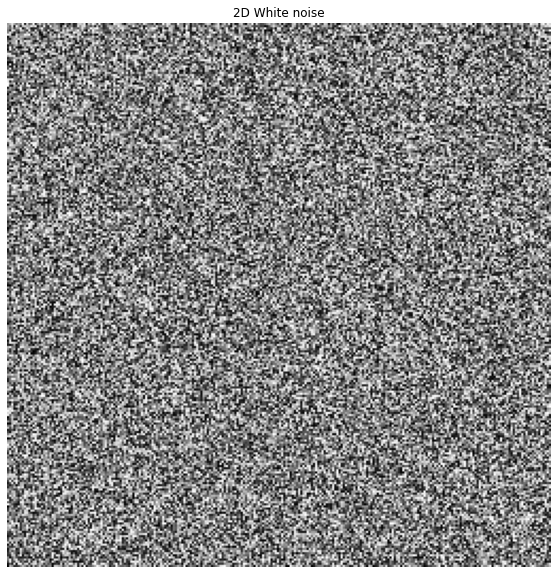

In [27]:
plt.imshow(img, cmap='gray')
plt.title("2D White noise")
plt.axis('off')
plt.show()

# Value noise

In [28]:
img = np.zeros((256, 256))

freq = 0.05

table = init_value_noise(256)
permutation_table = build_permutation_table(256)
for i in range(256):
    for j in range(256):
        img[i, j] = eval(i * freq, j * freq, table, 256, permutation_table)

img *= 256

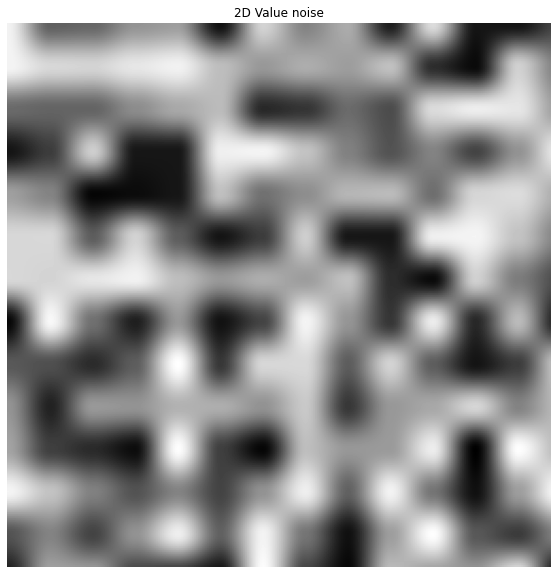

In [29]:
plt.imshow(img, cmap='gray')
plt.title("2D Value noise")
plt.axis('off')
plt.show()

# Fractal pattern

In [30]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 2.2
amplitudeFactor = 0.5
nb_layers = 7
curr_max_noise = 0

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        for k in range(nb_layers):
            img[i, j] += eval(val_i, val_j, table, 256, permutation_table) * amplitude
            val_i *= freqFactor 
            val_j *= freqFactor
            amplitude *= amplitudeFactor
        if img[i, j] > curr_max_noise:
            curr_max_noise = img[i, j]
img /= curr_max_noise

img *= 256

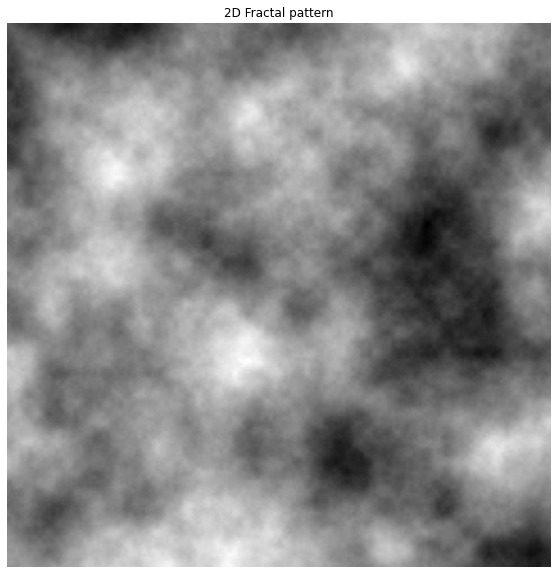

In [31]:
plt.imshow(img, cmap='gray')
plt.title("2D Fractal pattern")
plt.axis('off')
plt.show()

# Turbulence pattern

In [32]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 4.5
amplitudeFactor = 0.25
num_layers = 7
curr_max_noise = 0

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        for k in range(num_layers):
            img[i, j] += np.abs(2 * eval(val_i, val_j, table, 256, permutation_table) - 1) * amplitude
            val_i *= freqFactor
            val_j *= freqFactor
            amplitude *= amplitudeFactor

        if img[i, j] > curr_max_noise:
            curr_max_noise = img[i, j]

img /=  curr_max_noise

img *= 256

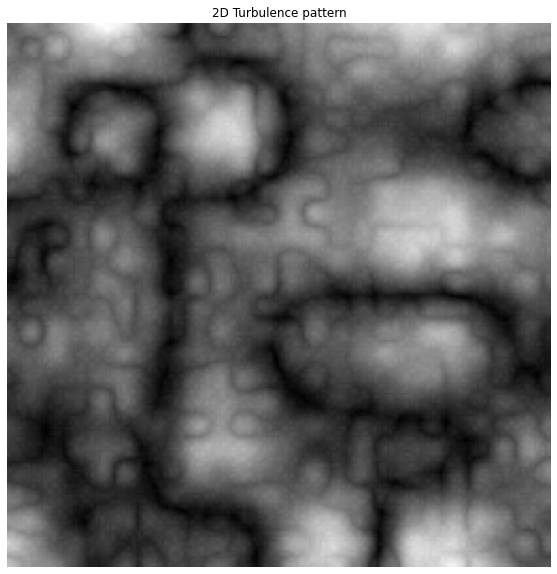

In [33]:
plt.imshow(img, cmap='gray')
plt.title("2D Turbulence pattern")
plt.axis('off')
plt.show()

# Marble Pattern

In [34]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 1.8
amplitudeFactor = 0.35
num_layers = 7

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        noiseVal = 0
        for k in range(num_layers):
            noiseVal += eval(val_i, val_j, table, 256, permutation_table) * amplitude
            val_i *= freqFactor
            val_j *= freqFactor
            amplitude *= amplitudeFactor

        img[i, j] = (np.sin((j + noiseVal * 100) * 2 * np.pi / 200.0) + 1) / 2.0
img *= 256

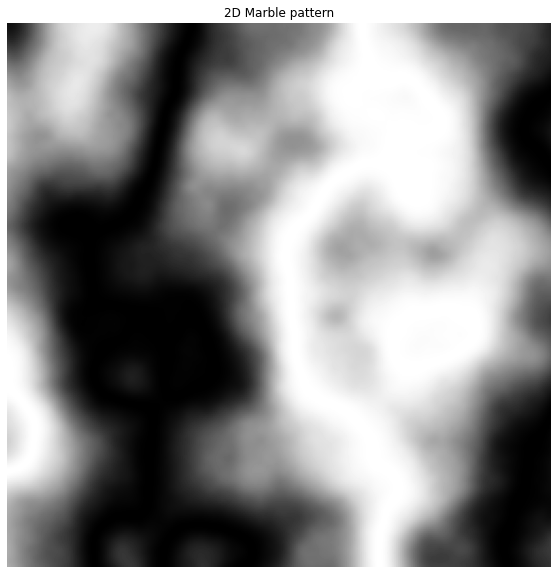

In [35]:
plt.imshow(img, cmap='gray')
plt.title("2D Marble pattern")
plt.axis('off')
plt.show()

# Wood Pattern

In [36]:
img = np.zeros((256, 256))

freq = 0.015

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        g = eval(val_i, val_j, table, 256, permutation_table) * 10
        img[i, j] = g - int(g)

img *= 256

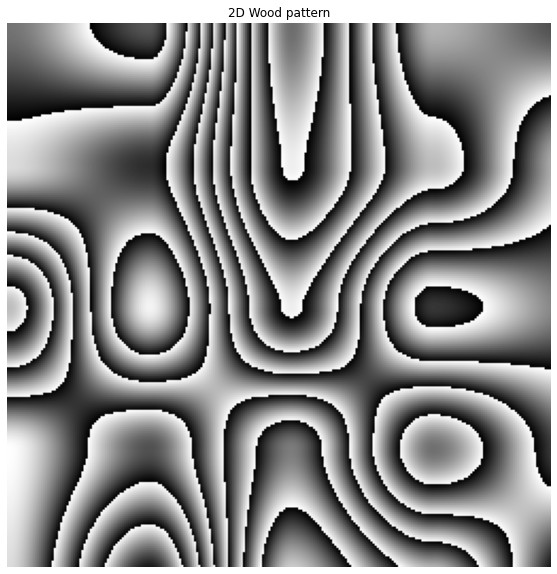

In [37]:
plt.imshow(img, cmap='gray')
plt.title("2D Wood pattern")
plt.axis('off')
plt.show()

# Perlin noise

In [59]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 1.8
amplitudeFactor = 0.7
num_layers = 5
curr_max_noise = 0

permutation_table = build_permutation_table(256)
gradient_vector = init_gradient_vectors(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        for k in range(num_layers):
            img[i, j] += eval_perlin(val_i, val_j, 256, permutation_table, gradient_vector) * amplitude
            amplitude *= amplitudeFactor
            val_i *= freqFactor
            val_j *= freqFactor
        if img[i, j] > curr_max_noise:
            curr_max_noise = img[i, j]
img /= curr_max_noise

img *= 256.0

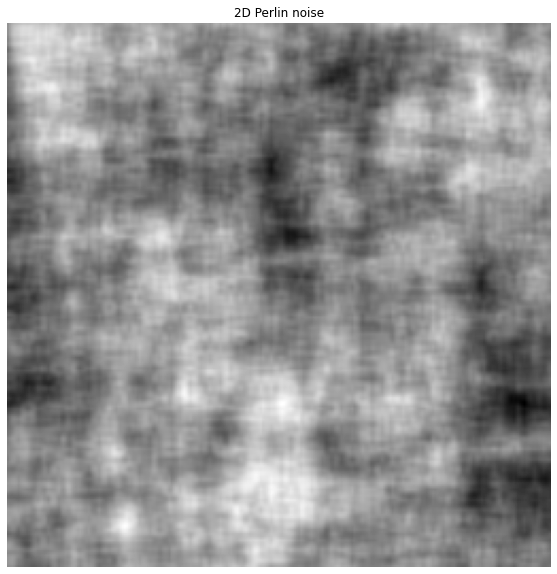

In [60]:
plt.imshow(img, cmap='gray')
plt.title("2D Perlin noise")
plt.axis('off')
plt.show()